In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
column_names = df.columns
print(column_names)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


## Data Manipulation
Manipulation is usually considered in a negative way, but it is an essential part of data analysis

Instead of default ranking, we will set Invoice ID as the index column

Also, we will sort the values by Rating in the descending order

In [8]:
# Assuming 'df' is your DataFrame
df.set_index('Invoice ID', inplace=True) #Giving Index Column
df.sort_values('Rating', ascending=False, inplace=True) #Sorting values based on Ratinga
df.head(4)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2/20/2019,16:49,Credit card,323.20,4.761905,16.1600,10.0
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,3/27/2019,19:18,Ewallet,560.34,4.761905,28.0170,10.0
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2/25/2019,11:58,Ewallet,527.90,4.761905,26.3950,10.0
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,13:40,Ewallet,495.63,4.761905,24.7815,10.0


In [2476]:
df.info() #Getting information about the each and every column

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 725-56-0833 to 885-56-0389
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross margin percentage  1000 non-null   float64
 14  gross income

In [2477]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Mode of Payment
Every consumer perfers different mode of payment, some may go with online payment, others may go with cash

Thus, we have to find out the number of transaction for each payment category

In [2478]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

## Details of Unit Price of the Products
Here, our task is to list out the products where the value of unit price is greater than 99.8

In [2479]:
df1=df[df['Unit price']>=99.8]
df1['Unit price'].sort_values(ascending=False)

Invoice ID
148-41-7930    99.96
219-22-9386    99.96
641-62-7288    99.92
437-53-3084    99.89
667-92-0055    99.83
446-47-6729    99.82
702-83-5291    99.82
Name: Unit price, dtype: float64

## Type of Customers in Mandalay
This time, we need to obtain insights for the customers who belongs to Mandalay city only

We need to need to select the customer from Mandalay having membership

Further, we need to count how many male and female members are there at that specific location

In [2480]:
df_Mandalay= df[df['City']== 'Mandalay'] #Specifying the city in which we need to focus on
df_Mandalay.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,3/27/2019,19:18,Ewallet,560.34,4.761905,28.0170,10.0
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2/25/2019,11:58,Ewallet,527.90,4.761905,26.3950,10.0
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,13:40,Ewallet,495.63,4.761905,24.7815,10.0
868-52-7573,B,Mandalay,Normal,Female,Food and beverages,99.69,5,24.9225,523.3725,1/14/2019,12:09,Cash,498.45,4.761905,24.9225,9.9
311-13-6971,B,Mandalay,Member,Male,Sports and travel,31.99,10,15.9950,335.8950,2/20/2019,15:18,Credit card,319.90,4.761905,15.9950,9.9


In [2481]:
df_Mandalay=df_Mandalay[df_Mandalay['Customer type']=='Member'] #Checking for the values where Member is true
df_Mandalay.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,13:40,Ewallet,495.63,4.761905,24.7815,10.0
311-13-6971,B,Mandalay,Member,Male,Sports and travel,31.99,10,15.9950,335.8950,2/20/2019,15:18,Credit card,319.90,4.761905,15.9950,9.9
201-86-2184,B,Mandalay,Member,Female,Electronic accessories,26.26,7,9.1910,193.0110,2/2/2019,19:40,Cash,183.82,4.761905,9.1910,9.9
109-28-2512,B,Mandalay,Member,Female,Fashion accessories,97.61,6,29.2830,614.9430,1/7/2019,15:01,Ewallet,585.66,4.761905,29.2830,9.9
425-85-2085,B,Mandalay,Member,Male,Health and beauty,54.86,5,13.7150,288.0150,3/29/2019,16:48,Ewallet,274.30,4.761905,13.7150,9.8


In [2482]:
df_Mandalay['Gender'].value_counts()#Counting the values of males and females

Gender
Female    85
Male      80
Name: count, dtype: int64

## Ratings of Electronic Accessories
Similar to the previous one, we now have to focus on the Naypyitaw branch

We have to list out the Electronic accessories products whose ratings are equal to or greater than 9

In [2483]:
df_Electronic_Accessories=df[df['City']=='Naypyitaw']
df_Electronic_Accessories.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.711,77.931,2/15/2019,17:47,Credit card,74.22,4.761905,3.711,10.0
342-65-4817,C,Naypyitaw,Member,Male,Health and beauty,86.80,3,13.020,273.420,1/28/2019,16:47,Ewallet,260.40,4.761905,13.020,9.9
362-58-8315,C,Naypyitaw,Normal,Male,Fashion accessories,76.52,5,19.130,401.730,3/25/2019,10:23,Cash,382.60,4.761905,19.130,9.9
214-17-6927,C,Naypyitaw,Normal,Female,Food and beverages,16.48,6,4.944,103.824,2/7/2019,18:23,Ewallet,98.88,4.761905,4.944,9.9
641-51-2661,C,Naypyitaw,Member,Female,Food and beverages,87.10,10,43.550,914.550,2/12/2019,14:45,Credit card,871.00,4.761905,43.550,9.9


In [2484]:
df_Electronic_Accessories= df_Electronic_Accessories[df_Electronic_Accessories['Product line']== 'Electronic accessories'] #Specifying the city in which we need to focus on
df_Electronic_Accessories.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
740-22-2500,C,Naypyitaw,Normal,Female,Electronic accessories,84.05,3,12.6075,264.7575,1/23/2019,13:29,Cash,252.15,4.761905,12.6075,9.8
426-39-2418,C,Naypyitaw,Normal,Male,Electronic accessories,61.41,7,21.4935,451.3635,1/14/2019,10:02,Cash,429.87,4.761905,21.4935,9.8
583-72-1480,C,Naypyitaw,Member,Male,Electronic accessories,37.06,4,7.4120,155.6520,1/31/2019,16:24,Ewallet,148.24,4.761905,7.4120,9.7
672-51-8681,C,Naypyitaw,Member,Female,Electronic accessories,66.65,9,29.9925,629.8425,1/4/2019,18:19,Credit card,599.85,4.761905,29.9925,9.7
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [2485]:
df_Electronic_Accessories=df_Electronic_Accessories[df_Electronic_Accessories['Rating']>=9] #Checking for the values where Member is true
df_Electronic_Accessories.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
740-22-2500,C,Naypyitaw,Normal,Female,Electronic accessories,84.05,3,12.6075,264.7575,1/23/2019,13:29,Cash,252.15,4.761905,12.6075,9.8
426-39-2418,C,Naypyitaw,Normal,Male,Electronic accessories,61.41,7,21.4935,451.3635,1/14/2019,10:02,Cash,429.87,4.761905,21.4935,9.8
583-72-1480,C,Naypyitaw,Member,Male,Electronic accessories,37.06,4,7.4120,155.6520,1/31/2019,16:24,Ewallet,148.24,4.761905,7.4120,9.7
672-51-8681,C,Naypyitaw,Member,Female,Electronic accessories,66.65,9,29.9925,629.8425,1/4/2019,18:19,Credit card,599.85,4.761905,29.9925,9.7
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [2486]:
df_Electronic_Accessories['Rating']

Invoice ID
740-22-2500    9.8
426-39-2418    9.8
583-72-1480    9.7
672-51-8681    9.7
226-31-3081    9.6
633-09-3463    9.5
389-25-3394    9.4
120-06-4233    9.3
861-77-0145    9.2
137-63-5492    9.0
Name: Rating, dtype: float64

In [2487]:
df_Electronic_Accessories.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
740-22-2500,C,Naypyitaw,Normal,Female,Electronic accessories,84.05,3,12.6075,264.7575,1/23/2019,13:29,Cash,252.15,4.761905,12.6075,9.8
426-39-2418,C,Naypyitaw,Normal,Male,Electronic accessories,61.41,7,21.4935,451.3635,1/14/2019,10:02,Cash,429.87,4.761905,21.4935,9.8
583-72-1480,C,Naypyitaw,Member,Male,Electronic accessories,37.06,4,7.4120,155.6520,1/31/2019,16:24,Ewallet,148.24,4.761905,7.4120,9.7
672-51-8681,C,Naypyitaw,Member,Female,Electronic accessories,66.65,9,29.9925,629.8425,1/4/2019,18:19,Credit card,599.85,4.761905,29.9925,9.7
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


## Highest Amount of Shopping
Now, our task is to obtain the data of the highest amount of shopping where the customers pays using their credit cards

In [2488]:
df_Highest_Amount_of_Shopping=df[df['Payment']=='Credit card']
df_Highest_Amount_of_Shopping

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2/20/2019,16:49,Credit card,323.20,4.761905,16.1600,10.0
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2/15/2019,17:47,Credit card,74.22,4.761905,3.7110,10.0
831-07-6050,A,Yangon,Normal,Male,Electronic accessories,32.71,5,8.1775,171.7275,3/19/2019,11:30,Credit card,163.55,4.761905,8.1775,9.9
311-13-6971,B,Mandalay,Member,Male,Sports and travel,31.99,10,15.9950,335.8950,2/20/2019,15:18,Credit card,319.90,4.761905,15.9950,9.9
641-51-2661,C,Naypyitaw,Member,Female,Food and beverages,87.10,10,43.5500,914.5500,2/12/2019,14:45,Credit card,871.00,4.761905,43.5500,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651-96-5970,A,Yangon,Normal,Male,Fashion accessories,46.41,1,2.3205,48.7305,3/3/2019,20:06,Credit card,46.41,4.761905,2.3205,4.0
828-46-6863,A,Yangon,Member,Male,Food and beverages,98.53,6,29.5590,620.7390,1/23/2019,11:22,Credit card,591.18,4.761905,29.5590,4.0
182-69-8360,B,Mandalay,Normal,Female,Electronic accessories,23.65,4,4.7300,99.3300,1/30/2019,13:32,Credit card,94.60,4.761905,4.7300,4.0


In [2489]:
df_Highest_Amount_of_Shopping['Total'].sort_values(ascending=False).head(5)

Invoice ID
860-79-0874    1042.650
687-47-8271    1039.290
744-16-7898    1022.385
271-88-8734    1020.705
219-22-9386     944.622
Name: Total, dtype: float64

## Data Visualization
So far, we have seen the analysis of data using various queries, now we will understand the insights in the form of visualizations

For this, we have already imported the matplotlib library

In [2490]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2/20/2019,16:49,Credit card,323.20,4.761905,16.1600,10.0
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,3/27/2019,19:18,Ewallet,560.34,4.761905,28.0170,10.0
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2/25/2019,11:58,Ewallet,527.90,4.761905,26.3950,10.0
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,13:40,Ewallet,495.63,4.761905,24.7815,10.0
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2/15/2019,17:47,Credit card,74.22,4.761905,3.7110,10.0


## Highest Shopping Amount¶
Our job is to visualize the data of the highest shopping done by the customers having membership

In [2491]:
df_Highest_Shopping_Amount=df[df['Customer type']=='Member']
df_Highest_Shopping_Amount.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,13:40,Ewallet,495.63,4.761905,24.7815,10.0
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2/15/2019,17:47,Credit card,74.22,4.761905,3.7110,10.0
342-65-4817,C,Naypyitaw,Member,Male,Health and beauty,86.80,3,13.0200,273.4200,1/28/2019,16:47,Ewallet,260.40,4.761905,13.0200,9.9
166-19-2553,A,Yangon,Member,Male,Sports and travel,89.06,6,26.7180,561.0780,1/18/2019,17:26,Cash,534.36,4.761905,26.7180,9.9
311-13-6971,B,Mandalay,Member,Male,Sports and travel,31.99,10,15.9950,335.8950,2/20/2019,15:18,Credit card,319.90,4.761905,15.9950,9.9


In [2492]:
df_Highest_Shopping_Amount=df_Highest_Shopping_Amount.sort_values('Total',ascending=False)
df_Highest_Shopping_Amount['Total'].head(10)

Invoice ID
860-79-0874    1042.6500
283-26-5248    1034.4600
271-88-8734    1020.7050
325-77-6186     951.8250
280-17-4359     950.2500
219-22-9386     944.6220
702-83-5291     943.2990
731-81-9469     942.9000
277-35-5865     935.2665
384-59-6655     932.3370
Name: Total, dtype: float64

Text(0.5, 1.0, 'Highest Amount Spend By Customer Having Membership')

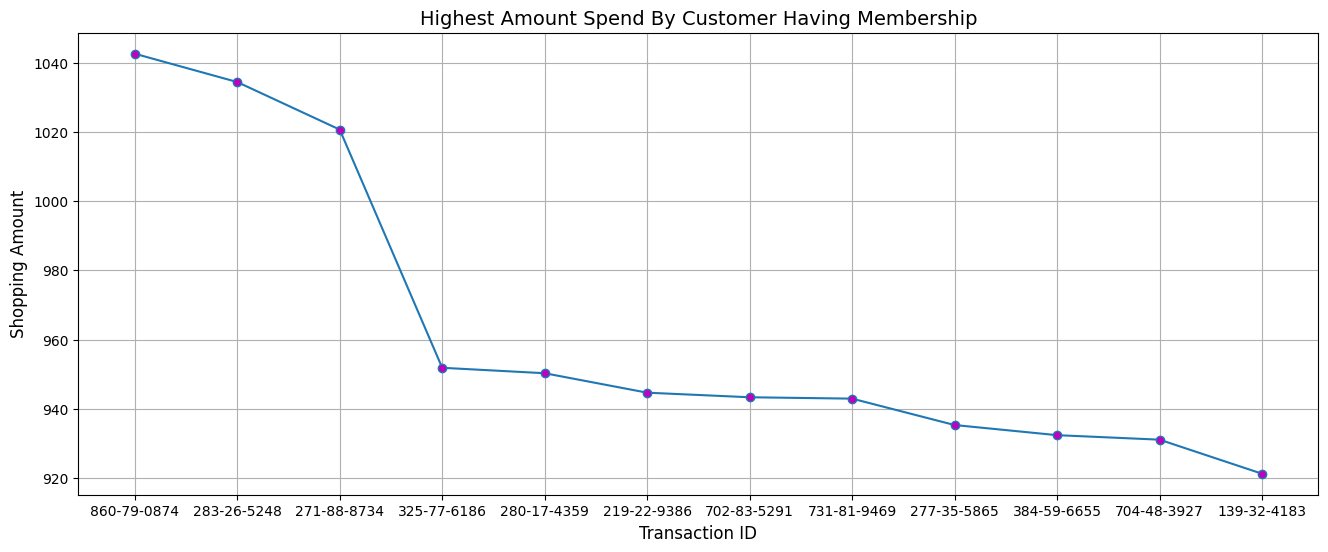

In [2493]:
df_line_plot=df_Highest_Shopping_Amount['Total'].head(12)
plt.figure(figsize=(16, 6))  # Set the size of the figure
plt.plot(df_line_plot,marker='o',mfc='m') #Giving specifications for the plot chart 

plt.grid() #Adding grid for better interpretation of no.
plt.ylabel("Shopping Amount",fontsize=12) #Adding label for y axis
plt.xlabel("Transaction ID",fontsize=12) #Adding label for x axis
plt.title("Highest Amount Spend By Customer Having Membership",fontsize=14) #Giving title, specifying fontsize

## Highest Gross Income By Female Customers
We need to find the insights of the shopping done in the Naypyitaw branch of the supermarket

Here, our focus is on the shopping done in Sports and travel category by the female customers

In [2494]:
df_Highest_Gross_Income_By_Female_Customers=df[df['City']=='Naypyitaw']
df_Highest_Gross_Income_By_Female_Customers.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.711,77.931,2/15/2019,17:47,Credit card,74.22,4.761905,3.711,10.0
342-65-4817,C,Naypyitaw,Member,Male,Health and beauty,86.80,3,13.020,273.420,1/28/2019,16:47,Ewallet,260.40,4.761905,13.020,9.9
362-58-8315,C,Naypyitaw,Normal,Male,Fashion accessories,76.52,5,19.130,401.730,3/25/2019,10:23,Cash,382.60,4.761905,19.130,9.9
214-17-6927,C,Naypyitaw,Normal,Female,Food and beverages,16.48,6,4.944,103.824,2/7/2019,18:23,Ewallet,98.88,4.761905,4.944,9.9
641-51-2661,C,Naypyitaw,Member,Female,Food and beverages,87.10,10,43.550,914.550,2/12/2019,14:45,Credit card,871.00,4.761905,43.550,9.9


In [2495]:
df_Highest_Gross_Income_By_Female_Customers=df_Highest_Gross_Income_By_Female_Customers[df_Highest_Gross_Income_By_Female_Customers['Gender']=='Female']
df_Highest_Gross_Income_By_Female_Customers.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2/15/2019,17:47,Credit card,74.22,4.761905,3.7110,10.0
214-17-6927,C,Naypyitaw,Normal,Female,Food and beverages,16.48,6,4.9440,103.8240,2/7/2019,18:23,Ewallet,98.88,4.761905,4.9440,9.9
641-51-2661,C,Naypyitaw,Member,Female,Food and beverages,87.10,10,43.5500,914.5500,2/12/2019,14:45,Credit card,871.00,4.761905,43.5500,9.9
740-22-2500,C,Naypyitaw,Normal,Female,Electronic accessories,84.05,3,12.6075,264.7575,1/23/2019,13:29,Cash,252.15,4.761905,12.6075,9.8
801-88-0346,C,Naypyitaw,Normal,Female,Fashion accessories,76.06,3,11.4090,239.5890,1/5/2019,20:30,Credit card,228.18,4.761905,11.4090,9.8


In [2496]:
df_Highest_Gross_Income_By_Female_Customers=df_Highest_Gross_Income_By_Female_Customers[df_Highest_Gross_Income_By_Female_Customers['Product line']=='Sports and travel']
df_Highest_Gross_Income_By_Female_Customers.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2/15/2019,17:47,Credit card,74.22,4.761905,3.7110,10.0
746-68-6593,C,Naypyitaw,Member,Female,Sports and travel,87.16,2,8.7160,183.0360,1/11/2019,14:29,Credit card,174.32,4.761905,8.7160,9.7
226-71-3580,C,Naypyitaw,Normal,Female,Sports and travel,23.75,9,10.6875,224.4375,1/31/2019,12:02,Cash,213.75,4.761905,10.6875,9.5
718-57-9773,C,Naypyitaw,Normal,Female,Sports and travel,49.33,10,24.6650,517.9650,2/3/2019,16:40,Credit card,493.30,4.761905,24.6650,9.4
400-89-4171,C,Naypyitaw,Normal,Female,Sports and travel,80.97,8,32.3880,680.1480,1/28/2019,13:05,Cash,647.76,4.761905,32.3880,9.3


In [2497]:
df_Highest_Gross_Income_By_Female_Customers=df_Highest_Gross_Income_By_Female_Customers.sort_values('gross income',ascending=False)
df_Highest_Gross_Income_By_Female_Customers['gross income'].head()

Invoice ID
554-42-2417    47.7200
731-81-9469    44.9000
678-79-0726    40.7835
400-89-4171    32.3880
394-55-6384    31.5855
Name: gross income, dtype: float64

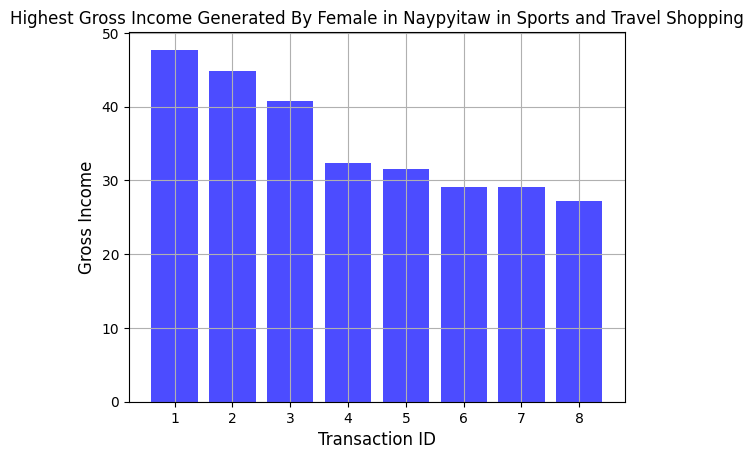

In [2498]:
import matplotlib.pyplot as plt

df_bar_graph_no = [1, 2, 3, 4, 5, 6, 7, 8]
df_bar_graph = df_Highest_Gross_Income_By_Female_Customers['gross income'].head(len(df_bar_graph_no))

plt.bar(df_bar_graph_no, df_bar_graph, color='b', alpha=0.7) #alpha func to reduce the color intensity of the bar graph
plt.grid()
plt.title("Highest Gross Income Generated By Female in Naypyitaw in Sports and Travel Shopping")
plt.ylabel("Gross Income",fontsize=12) 
plt.xlabel("Transaction ID", fontsize=12) # Adding x-axis label
plt.show()

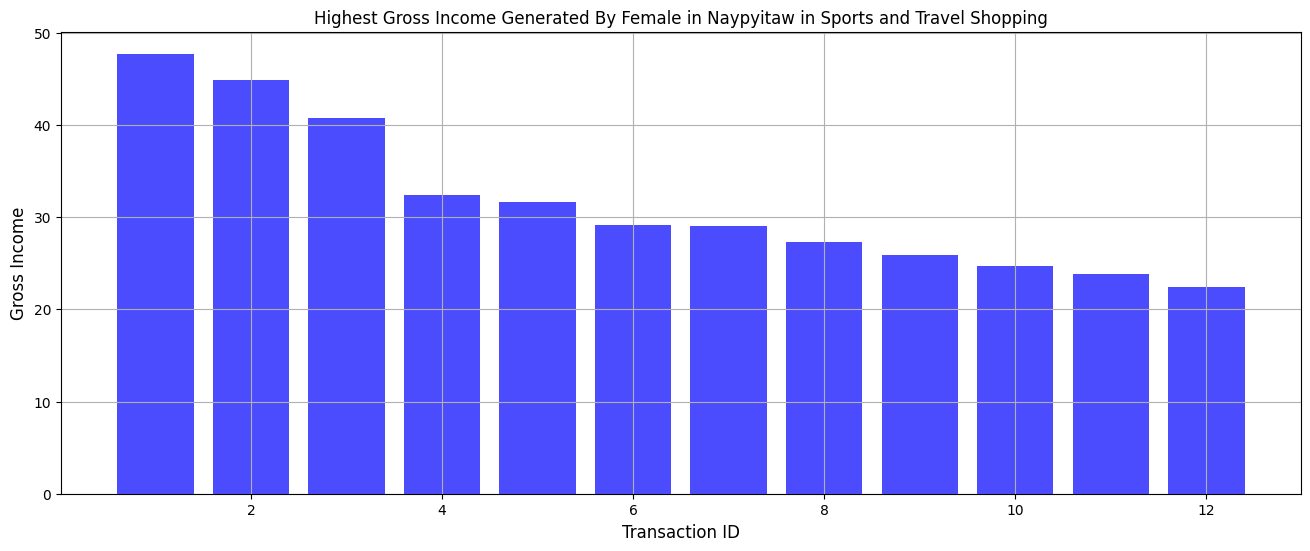

In [2499]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))  # Set the size of the figure
df_bar_graph_no = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df_bar_graph = df_Highest_Gross_Income_By_Female_Customers['gross income'].head(12)

plt.bar(df_bar_graph_no[:len(df_bar_graph)], df_bar_graph, color='b', alpha=0.7) # Slicing both arrays
plt.grid()
plt.title("Highest Gross Income Generated By Female in Naypyitaw in Sports and Travel Shopping")
plt.ylabel("Gross Income", fontsize=12)
plt.xlabel("Transaction ID", fontsize=12) # Adding x-axis label
plt.show()


## Comparision of Health and Beauty Product
In this visualization, we have to compare between the health and beauty products buyers among male and female

The interesting thing here is that we have to plot both the graphs in a same visualization to compare both of them

In [2500]:
df_Health_and_Beauty=df[df['Product line']=='Health and beauty']
df_Health_and_Beauty.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.160,339.360,2/20/2019,16:49,Credit card,323.20,4.761905,16.160,10.0
342-65-4817,C,Naypyitaw,Member,Male,Health and beauty,86.80,3,13.020,273.420,1/28/2019,16:47,Ewallet,260.40,4.761905,13.020,9.9
563-47-4072,B,Mandalay,Normal,Female,Health and beauty,55.81,6,16.743,351.603,1/22/2019,11:52,Cash,334.86,4.761905,16.743,9.9
425-85-2085,B,Mandalay,Member,Male,Health and beauty,54.86,5,13.715,288.015,3/29/2019,16:48,Ewallet,274.30,4.761905,13.715,9.8
127-47-6963,A,Yangon,Normal,Male,Health and beauty,51.71,4,10.342,217.182,3/9/2019,13:53,Credit card,206.84,4.761905,10.342,9.8


In [2501]:
df_Health_and_Beauty_Male=df_Health_and_Beauty[df_Health_and_Beauty['Gender']=='Male']
df_Health_and_Beauty_Male=df_Health_and_Beauty_Male.sort_values('Total',ascending=False)

df_Health_and_Beauty_Female=df_Health_and_Beauty[df_Health_and_Beauty['Gender']=='Female']
df_Health_and_Beauty_Female=df_Health_and_Beauty_Female.sort_values('Total',ascending=False)

In [2502]:
df_Health_and_Beauty_Male.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
280-17-4359,C,Naypyitaw,Member,Male,Health and beauty,90.50,10,45.250,950.250,1/25/2019,13:48,Cash,905.00,4.761905,45.250,8.1
766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.935,922.635,3/29/2019,10:25,Ewallet,878.70,4.761905,43.935,5.1
743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,3/30/2019,14:43,Ewallet,874.98,4.761905,43.749,6.0
450-42-3339,C,Naypyitaw,Normal,Male,Health and beauty,84.61,10,42.305,888.405,2/9/2019,18:58,Credit card,846.10,4.761905,42.305,8.8
628-90-8624,B,Mandalay,Member,Male,Health and beauty,82.58,10,41.290,867.090,3/14/2019,14:41,Cash,825.80,4.761905,41.290,5.0


In [2503]:
df_Health_and_Beauty_Female.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
418-02-5978,B,Mandalay,Normal,Female,Health and beauty,84.09,9,37.8405,794.6505,2/11/2019,10:54,Cash,756.81,4.761905,37.8405,8.0
829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
338-65-2210,C,Naypyitaw,Member,Female,Health and beauty,68.60,10,34.3000,720.3000,2/5/2019,19:57,Cash,686.00,4.761905,34.3000,9.1
222-42-0244,B,Mandalay,Member,Female,Health and beauty,72.11,9,32.4495,681.4395,1/28/2019,13:53,Credit card,648.99,4.761905,32.4495,7.7
759-98-4285,C,Naypyitaw,Member,Female,Health and beauty,85.87,7,30.0545,631.1445,2/27/2019,19:01,Credit card,601.09,4.761905,30.0545,8.0


In [2504]:
df_Health_and_Beauty_Male['Total'].head()

Invoice ID
280-17-4359    950.250
766-85-7061    922.635
743-04-1105    918.729
450-42-3339    888.405
628-90-8624    867.090
Name: Total, dtype: float64

In [2505]:
df_Health_and_Beauty_Female['Total'].head()

Invoice ID
418-02-5978    794.6505
829-34-3910    749.4900
338-65-2210    720.3000
222-42-0244    681.4395
759-98-4285    631.1445
Name: Total, dtype: float64

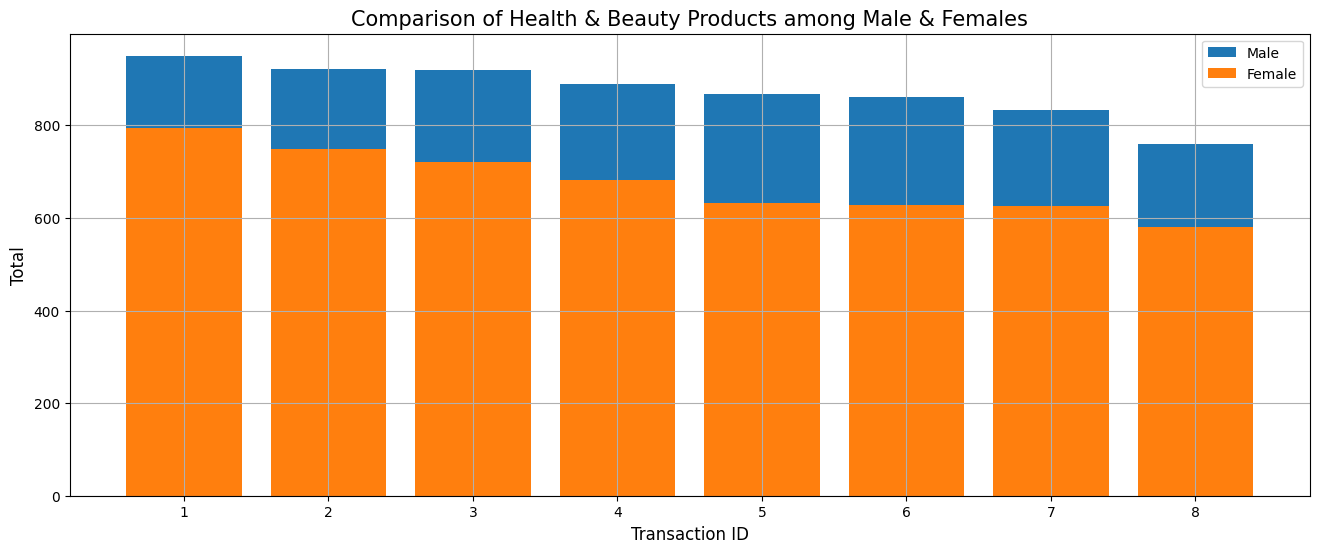

In [2506]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))  # Set the size of the figure

df_bar_graph_no = [1, 2, 3, 4, 5, 6, 7, 8]
df_Health_and_Beauty_Male = df_Health_and_Beauty_Male['Total'].head(len(df_bar_graph_no))
df_Health_and_Beauty_Female = df_Health_and_Beauty_Female['Total'].head(len(df_bar_graph_no))

plt.bar(df_bar_graph_no, df_Health_and_Beauty_Male, label="Male")
plt.bar(df_bar_graph_no, df_Health_and_Beauty_Female, label="Female")

plt.grid()
plt.title("Comparison of Health & Beauty Products among Male & Females", fontsize=15)
plt.xlabel("Transaction ID", fontsize=12)
plt.ylabel("Total", fontsize=12)
plt.legend()
plt.show()


## No. of Shoppers in Each Branch
Our job here is to compare the no. of customers from all the three branches

Along with this, we also need to display the percentage share of customer belonging from each branch

In [2507]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

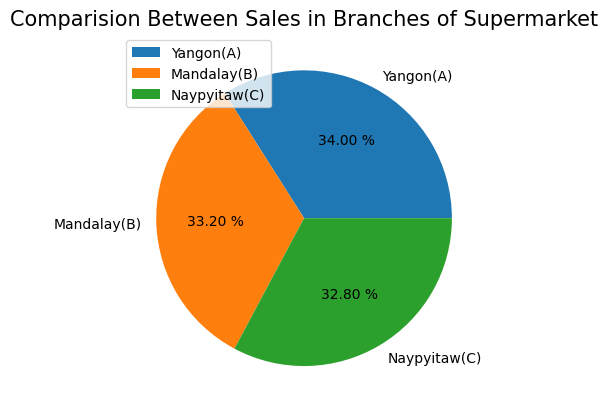

In [2508]:
df_pie_chart=df['City'].value_counts()

plt.pie(df_pie_chart,labels=['Yangon(A)','Mandalay(B)','Naypyitaw(C)'],autopct="%0.2f %%")

plt.title("Comparision Between Sales in Branches of Supermarket",fontsize=15)
plt.legend(loc=2)
plt.show()

## Sales Trends Over Time:

Line chart showing sales revenue or quantity sold over different time periods

In [2509]:
df['Date'].dtypes

dtype('O')

In [2510]:
df['Date']

Invoice ID
725-56-0833    2/20/2019
423-57-2993    3/27/2019
866-70-2814    2/25/2019
347-34-2234     2/3/2019
285-68-5083    2/15/2019
                 ...    
182-69-8360    1/30/2019
845-94-6841     1/8/2019
131-15-8856    3/30/2019
730-61-8757    1/25/2019
885-56-0389    2/12/2019
Name: Date, Length: 1000, dtype: object

In [2511]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtypes

dtype('<M8[ns]')

In [2512]:
df['Date']

Invoice ID
725-56-0833   2019-02-20
423-57-2993   2019-03-27
866-70-2814   2019-02-25
347-34-2234   2019-02-03
285-68-5083   2019-02-15
                 ...    
182-69-8360   2019-01-30
845-94-6841   2019-01-08
131-15-8856   2019-03-30
730-61-8757   2019-01-25
885-56-0389   2019-02-12
Name: Date, Length: 1000, dtype: datetime64[ns]

In [2513]:
# Group by 'Date' and sum up 'Total' sales revenue or 'Quantity' sold
sales_over_time = df.groupby('Date')['Total'].sum()  # Change 'Total' to 'Quantity' if analyzing quantity sold
sales_over_time

Date
2019-01-01    4745.1810
2019-01-02    1945.5030
2019-01-03    2078.1285
2019-01-04    1623.6885
2019-01-05    3536.6835
                ...    
2019-03-26    1962.5130
2019-03-27    2902.8195
2019-03-28    2229.4020
2019-03-29    4023.2430
2019-03-30    4487.0595
Name: Total, Length: 89, dtype: float64

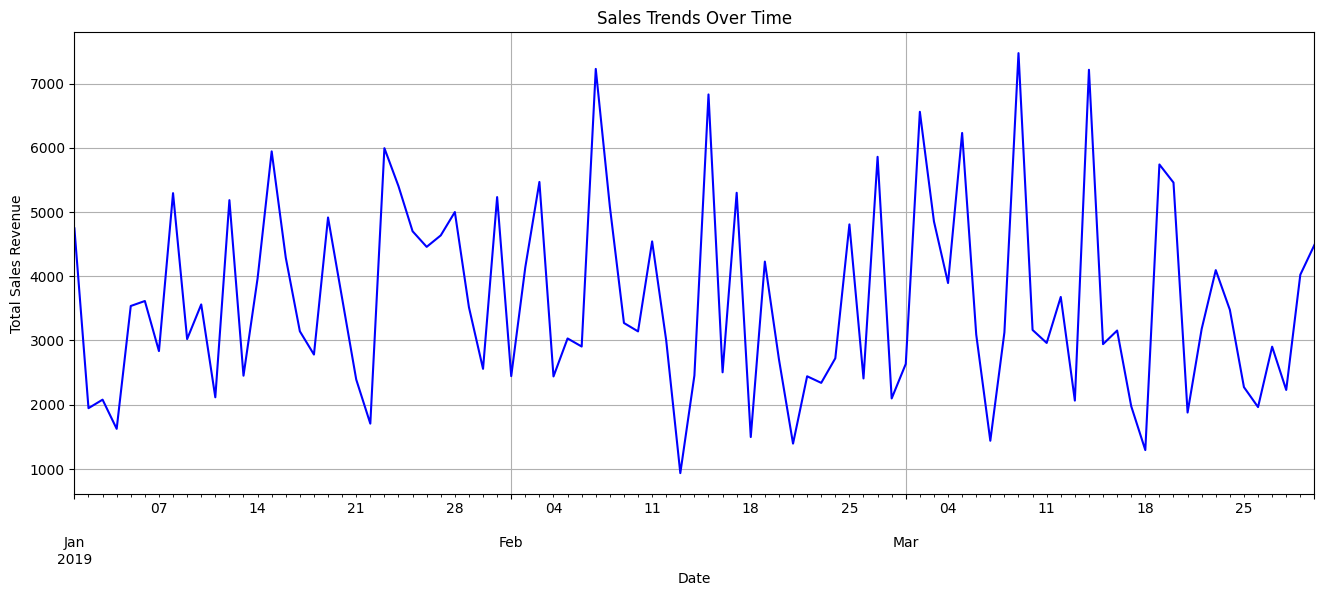

In [2514]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))  # Set the size of the figure
# Plotting the data
sales_over_time.plot(kind='line', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Revenue')
plt.grid(True)
plt.show()


## Seasonal Analysis:

Seasonal decomposition plot (e.g., using decomposition techniques like STL decomposition) to identify seasonal patterns in sales.

In [2515]:
df_Seasonal_Analysis = df.copy()
# Convert 'Date' columns to datetime format separately
df_Seasonal_Analysis['Date'] = pd.to_datetime(df_Seasonal_Analysis['Date'])
df_Seasonal_Analysis['Date']

Invoice ID
725-56-0833   2019-02-20
423-57-2993   2019-03-27
866-70-2814   2019-02-25
347-34-2234   2019-02-03
285-68-5083   2019-02-15
                 ...    
182-69-8360   2019-01-30
845-94-6841   2019-01-08
131-15-8856   2019-03-30
730-61-8757   2019-01-25
885-56-0389   2019-02-12
Name: Date, Length: 1000, dtype: datetime64[ns]

In [2516]:
# Convert 'Time' columns to datetime format separately
# Custom function to convert time string to datetime
def parse_time(time_str):
    if pd.isnull(time_str):  # Check for missing values
        return pd.NaT
    parts = time_str.split(':')
    if len(parts) == 2:  # HH:MM format
        return pd.to_datetime(time_str, format='%H:%M').time()
    elif len(parts) == 3:  # HH:MM:SS format
        return pd.to_datetime(time_str, format='%H:%M:%S').time()
    else:
        return pd.NaT

In [2517]:
# Apply the custom function to convert 'Time' column to datetime format
df_Seasonal_Analysis['Time'] = df_Seasonal_Analysis['Time'].apply(parse_time)
df_Seasonal_Analysis['Time']

Invoice ID
725-56-0833    16:49:00
423-57-2993    19:18:00
866-70-2814    11:58:00
347-34-2234    13:40:00
285-68-5083    17:47:00
                 ...   
182-69-8360    13:32:00
845-94-6841    19:38:00
131-15-8856    19:26:00
730-61-8757    10:11:00
885-56-0389    17:49:00
Name: Time, Length: 1000, dtype: object

In [2518]:
# Combine 'Date' and 'Time' columns into a single datetime column
df_Seasonal_Analysis['DateTime'] = df_Seasonal_Analysis['Date'] + pd.to_timedelta(df_Seasonal_Analysis['Time'].astype(str))

# Set the 'DateTime' column as the index
df_Seasonal_Analysis.set_index('DateTime', inplace=True)

# Drop the 'Date' and 'Time' columns if they are no longer needed
df_Seasonal_Analysis.drop(['Date', 'Time'], axis=1, inplace=True)

# Display the DataFrame
df_Seasonal_Analysis.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
DateTime,,,,,,,,,,,,,,
2019-02-20 16:49:00,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,Credit card,323.20,4.761905,16.1600,10.0
2019-03-27 19:18:00,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,Ewallet,560.34,4.761905,28.0170,10.0
2019-02-25 11:58:00,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,Ewallet,527.90,4.761905,26.3950,10.0
2019-02-03 13:40:00,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,Ewallet,495.63,4.761905,24.7815,10.0
2019-02-15 17:47:00,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,Credit card,74.22,4.761905,3.7110,10.0


In [2519]:
# Extract 'Total' sales revenue (or 'Quantity' sold) for analysis
sales_data = df['Total']  # Change 'Total' to 'Quantity' if analyzing quantity sold
sales_data

Invoice ID
725-56-0833    339.3600
423-57-2993    588.3570
866-70-2814    554.2950
347-34-2234    520.4115
285-68-5083     77.9310
                 ...   
182-69-8360     99.3300
845-94-6841    688.7160
131-15-8856    609.1680
730-61-8757    214.7460
885-56-0389     54.9675
Name: Total, Length: 1000, dtype: float64

In [2520]:
# from statsmodels.tsa.seasonal import STL
# # Perform seasonal decomposition using STL
# stl = STL(sales_data, seasonal=12)  # Adjust seasonal period as needed
# result = stl.fit()

# # Display the result of seasonal decomposition
# result.summary()

## Product Performance Analysis:
Bar chart showing top-selling products by revenue or quantity.

Pareto chart to identify the most significant contributors to total sales.

In [2521]:
# Aggregate data by 'Product line' and sum up 'Total' sales revenue or 'Quantity' sold
product_sales = df.groupby('Product line')['Total'].sum()
# Sort the data in descending order
product_sales_sorted = product_sales.sort_values(ascending=False)
product_sales_sorted

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

"Food and beverages" generated a total sales revenue of $56,144.84.

"Sports and travel" generated a total sales revenue of $55,122.83.

Similarly, "Electronic accessories", "Fashion accessories", "Home and lifestyle", and "Health and beauty" generated their respective total sales revenue.

This output provides insights into the sales performance of each product line, helping to identify which product categories contribute the most to the overall sales revenue. This information is useful for further analysis and decision-making in product management, marketing, and inventory optimization.

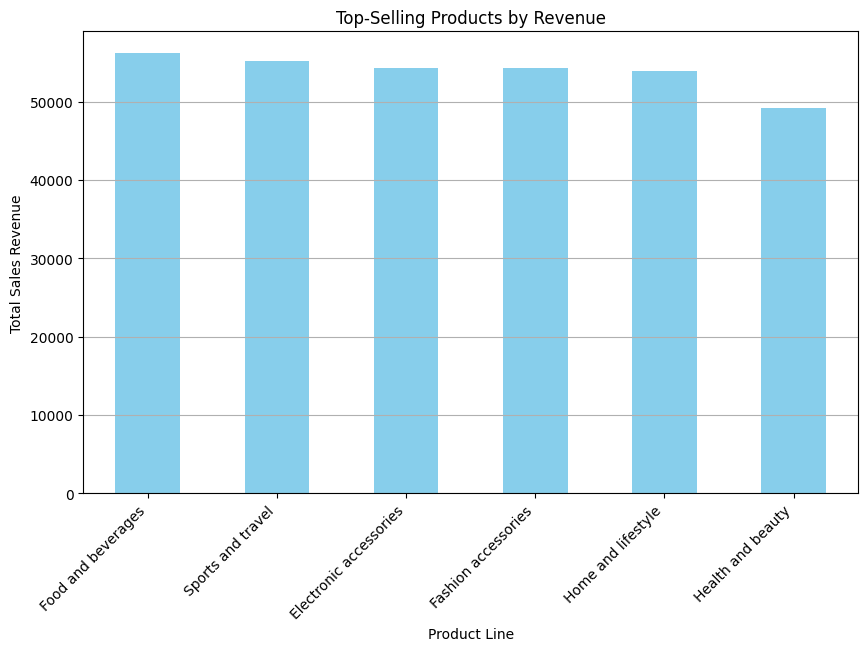

In [2522]:
# Create a bar chart showing top-selling products   Bar chart showing top-selling products by revenue or quantity.
plt.figure(figsize=(10, 6))
product_sales_sorted.plot(kind='bar', color='skyblue')
plt.title('Top-Selling Products by Revenue')
plt.xlabel('Product Line')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

cumulative percentage represents the total contribution of individual products to the overall sales revenue or quantity sold.

cumulative percentages help identify the relative contribution of each product line to the total sales revenue, providing insights into the significance of each product category in driving overall sales performance.

In [2523]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182-69-8360,B,Mandalay,Normal,Female,Electronic accessories,23.65,4,4.7300,99.3300,2019-01-30,13:32,Credit card,94.60,4.761905,4.7300,4.0
845-94-6841,C,Naypyitaw,Member,Female,Food and beverages,72.88,9,32.7960,688.7160,2019-01-08,19:38,Cash,655.92,4.761905,32.7960,4.0
131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.0080,609.1680,2019-03-30,19:26,Credit card,580.16,4.761905,29.0080,4.0


In [2524]:
product_sales_sorted.cumsum()

Product line
Food and beverages         56144.8440
Sports and travel         111267.6705
Electronic accessories    165605.2020
Fashion accessories       219911.0970
Home and lifestyle        273773.0100
Health and beauty         322966.7490
Name: Total, dtype: float64

In [2525]:
product_sales_sorted.sum()

322966.749

In [2526]:
# Calculate cumulative percentage
cumulative_percentage = (product_sales_sorted.cumsum() / product_sales_sorted.sum()) * 100
cumulative_percentage

Product line
Food and beverages         17.384094
Sports and travel          34.451742
Electronic accessories     51.276239
Fashion accessories        68.090941
Home and lifestyle         84.768172
Health and beauty         100.000000
Name: Total, dtype: float64

"Food and beverages" contributes approximately 17.38% of the total sales revenue.

"Sports and travel" contributes approximately 34.45% of the total sales revenue, including the sales revenue of "Food and beverages" and "Sports and travel" combined.

Similarly, "Electronic accessories" contributes approximately 51.28% of the total sales revenue, including the sales revenue of the first three product lines combined.

"Health and beauty" contributes 100% of the total sales revenue, as it represents the cumulative percentage when all product lines are considered.

In [2527]:
product_sales_sorted.index

Index(['Food and beverages', 'Sports and travel', 'Electronic accessories',
       'Fashion accessories', 'Home and lifestyle', 'Health and beauty'],
      dtype='object', name='Product line')

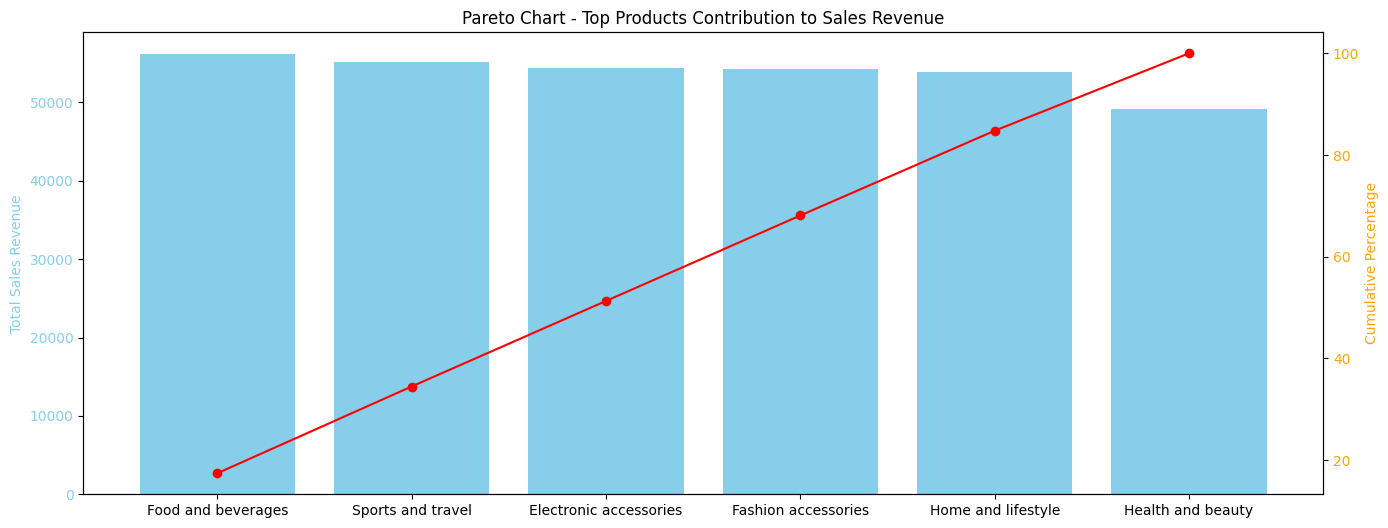

In [2528]:
# Create Pareto chart  Pareto chart to identify the most significant contributors to total sales.
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.bar(product_sales_sorted.index, product_sales_sorted, color='skyblue')
ax1.set_ylabel('Total Sales Revenue', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(product_sales_sorted.index, cumulative_percentage, color='red', marker='o', linestyle='-') # Plotting Line Chart for Cumulative Percentage:
ax2.set_ylabel('Cumulative Percentage', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.grid(False)

plt.title('Pareto Chart - Top Products Contribution to Sales Revenue')
plt.xticks(rotation=45, ha='right')

plt.show()

## Customer Segmentation:
Pie chart or bar chart showing the distribution of sales by customer demographics (e.g., age, gender, location).

Cluster analysis to identify distinct customer segments based on purchasing behavior.

### Pie chart or bar chart showing the distribution of sales by customer demographics:

In [2529]:
# Group the data by customer demographics and calculate total sales
sales_by_gender = df.groupby('Gender')['Total'].sum()
sales_by_gender

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

In [2530]:
sales_by_customer_type = df.groupby('Customer type')['Total'].sum()
sales_by_customer_type

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [2531]:
sales_by_customer_type = df.groupby('Customer type')['Total'].sum()
sales_by_customer_type

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

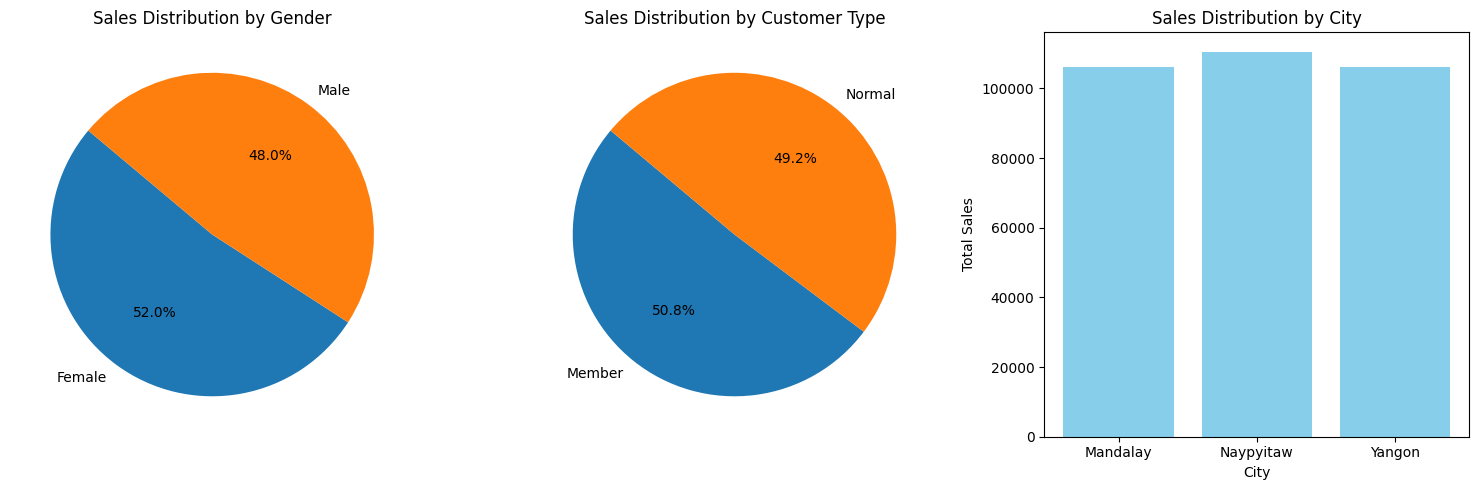

In [2532]:
# Create pie charts or bar charts for each demographic
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(sales_by_gender, labels=sales_by_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Gender')

plt.subplot(1, 3, 2)
plt.pie(sales_by_customer_type, labels=sales_by_customer_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Customer Type')

plt.subplot(1, 3, 3)
plt.bar(sales_by_city.index, sales_by_city, color='skyblue')
plt.title('Sales Distribution by City')
plt.xlabel('City')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

### Cluster analysis to identify distinct customer segments:

In [2533]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0


In [2534]:
# Choose features for clustering
X = df[['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']]  # Features related to purchasing behavior
X

,Unit price,Quantity,Total,gross income,Rating
Invoice ID,,,,,
725-56-0833,32.32,10,339.3600,16.1600,10.0
423-57-2993,93.39,6,588.3570,28.0170,10.0
866-70-2814,52.79,10,554.2950,26.3950,10.0
347-34-2234,55.07,9,520.4115,24.7815,10.0
285-68-5083,24.74,3,77.9310,3.7110,10.0
...,...,...,...,...,...
182-69-8360,23.65,4,99.3300,4.7300,4.0
845-94-6841,72.88,9,688.7160,32.7960,4.0
131-15-8856,72.52,8,609.1680,29.0080,4.0


In [2535]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

C:\Users\ganes\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\ganes\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\ganes\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\ganes\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

array([[-0.88183214,  1.53663531,  0.06670367,  0.06670367,  1.76239353],
       [ 1.42431676,  0.16769517,  1.07986532,  1.07986532,  1.76239353],
       [-0.1088361 ,  1.53663531,  0.94126802,  0.94126802,  1.76239353],
       ...,
       [ 0.63621577,  0.85216524,  1.16454468,  1.16454468, -1.73060722],
       [-0.17152167, -0.5167749 , -0.44034712, -0.44034712, -1.73060722],
       [-0.12545155, -1.54348001, -1.09048126, -1.09048126, -1.73060722]])

In [2536]:
from sklearn.cluster import KMeans
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [2537]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster
Invoice ID,,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0,1
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0,2
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0,2
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0,2
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0,0


In [2538]:
clusters

C:\Users\ganes\anaconda3\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1,
       0, 1, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1,
       2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0,
       1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0,

In [2539]:
df['Cluster'].dtypes

dtype('int32')

In [2540]:
# Check data types of all columns
print(df.dtypes)

Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
Cluster                             int32
dtype: object


In [2541]:
# Check for missing values
print(df.isnull().sum())

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Cluster                    0
dtype: int64


In [2542]:
# Check for object-type columns other than 'Cluster'
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Time',
       'Payment'],
      dtype='object')


In [2543]:
# Check the grouping column
print(df.groupby('Cluster').size())

Cluster
0    409
1    293
2    298
dtype: int64


In [2544]:
Cluster_analyze = df.copy()
# Convert all other columns to numeric if needed
Cluster_analyze[Cluster_analyze.columns.difference(['Cluster'])] = Cluster_analyze[Cluster_analyze.columns.difference(['Cluster'])].apply(pd.to_numeric, errors='coerce')

In [2545]:
Cluster_analyze.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster
Invoice ID,,,,,,,,,,,,,,,,,
725-56-0833,NaN,NaN,NaN,NaN,NaN,32.32,10,16.1600,339.3600,1550620800000000000,NaN,NaN,323.20,4.761905,16.1600,10.0,1
423-57-2993,NaN,NaN,NaN,NaN,NaN,93.39,6,28.0170,588.3570,1553644800000000000,NaN,NaN,560.34,4.761905,28.0170,10.0,2
866-70-2814,NaN,NaN,NaN,NaN,NaN,52.79,10,26.3950,554.2950,1551052800000000000,NaN,NaN,527.90,4.761905,26.3950,10.0,2
347-34-2234,NaN,NaN,NaN,NaN,NaN,55.07,9,24.7815,520.4115,1549152000000000000,NaN,NaN,495.63,4.761905,24.7815,10.0,2
285-68-5083,NaN,NaN,NaN,NaN,NaN,24.74,3,3.7110,77.9310,1550188800000000000,NaN,NaN,74.22,4.761905,3.7110,10.0,0


In [2546]:
cluster_0_rows = Cluster_analyze[Cluster_analyze['Cluster'] == 0]
cluster_0_rows.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster
Invoice ID,,,,,,,,,,,,,,,,,
285-68-5083,NaN,NaN,NaN,NaN,NaN,24.74,3,3.7110,77.9310,1550188800000000000,NaN,NaN,74.22,4.761905,3.7110,10.0,0
342-65-4817,NaN,NaN,NaN,NaN,NaN,86.80,3,13.0200,273.4200,1548633600000000000,NaN,NaN,260.40,4.761905,13.0200,9.9,0
400-60-7251,NaN,NaN,NaN,NaN,NaN,74.07,1,3.7035,77.7735,1549756800000000000,NaN,NaN,74.07,4.761905,3.7035,9.9,0
436-54-4512,NaN,NaN,NaN,NaN,NaN,91.61,1,4.5805,96.1905,1553040000000000000,NaN,NaN,91.61,4.761905,4.5805,9.8,0
560-49-6611,NaN,NaN,NaN,NaN,NaN,45.58,1,2.2790,47.8590,1549497600000000000,NaN,NaN,45.58,4.761905,2.2790,9.8,0


In [2547]:
# Analyze characteristics of each cluster
cluster_analysis = Cluster_analyze.groupby('Cluster').mean()

# Print or visualize the characteristics of each cluster
cluster_analysis

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Cluster,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,55.262958,2.564792,7.056879,148.194458,1.550197e+18,NaN,NaN,141.137579,4.761905,7.056879,6.910024
1,NaN,NaN,NaN,NaN,NaN,31.890478,7.290102,11.512500,241.762500,1.550009e+18,NaN,NaN,230.250000,4.761905,11.512500,7.180887
2,NaN,NaN,NaN,NaN,NaN,79.616342,7.802013,30.603836,642.680547,1.550066e+18,NaN,NaN,612.076711,4.761905,30.603836,6.854027


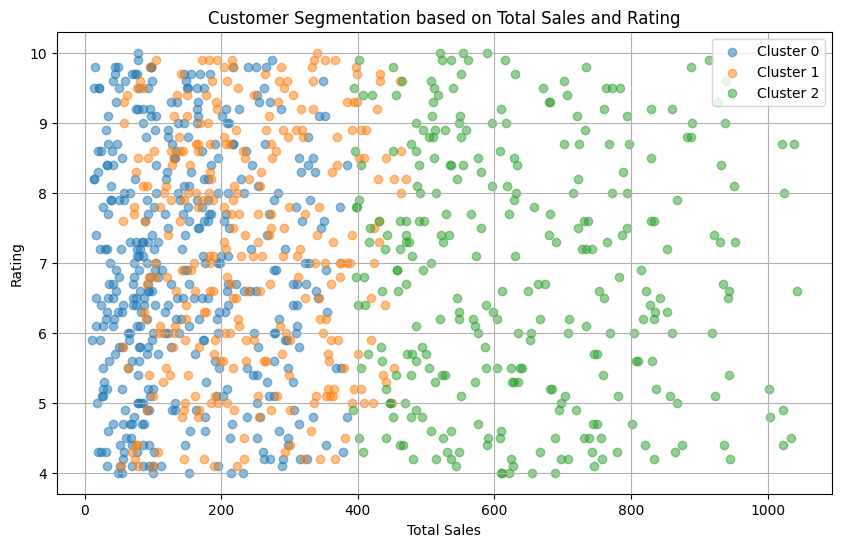

In [2548]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters using scatter plots
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster in range(3):
    cluster_data = Cluster_analyze[Cluster_analyze['Cluster'] == cluster]
    # print(cluster_data)
    plt.scatter(cluster_data['Total'], cluster_data['Rating'], label=f'Cluster {cluster}', alpha=0.5)

plt.title('Customer Segmentation based on Total Sales and Rating')
plt.xlabel('Total Sales')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

## Promotion Effectiveness:
Comparison of sales before, during, and after promotional periods using a line or bar chart.

In [2549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Define the start and end dates of promotional periods
promotion_start_date = '2019-03-03'
promotion_end_date = '2019-04-02'

# Divide data into periods: before, during, and after promotions
before_promotion = df[df['Date'] < promotion_start_date]
during_promotion = df[(df['Date'] >= promotion_start_date) & (df['Date'] <= promotion_end_date)]
after_promotion = df[df['Date'] > promotion_end_date]
after_promotion.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster
Invoice ID,,,,,,,,,,,,,,,,,


In [2550]:
# Calculate total sales for each period
total_sales_before = before_promotion['Total'].sum()
total_sales_during = during_promotion['Total'].sum()
total_sales_after = after_promotion['Total'].sum()
total_sales_before

222705.91350000002

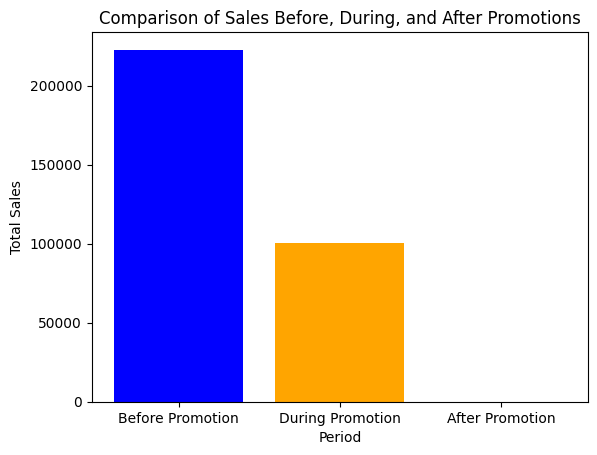

In [2551]:
# Visualize the comparison of sales before, during, and after promotions
periods = ['Before Promotion', 'During Promotion', 'After Promotion']
total_sales = [total_sales_before, total_sales_during, total_sales_after]

plt.bar(periods, total_sales, color=['blue', 'orange', 'green'])
plt.title('Comparison of Sales Before, During, and After Promotions')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.show()

## Basket Analysis:
Association rules analysis to identify frequently co-occurring products in transactions.

Sankey diagram or heatmap to visualize product associations.

In [2552]:
from mlxtend.frequent_patterns import apriori, association_rules
basket_analysis = df.copy()
# Each column represents a product line, and each row represents a transaction
basket = pd.get_dummies(basket_analysis['Product line'], dtype = 'int64')
basket

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Invoice ID,,,,,,
725-56-0833,0,0,0,1,0,0
423-57-2993,0,0,0,0,0,1
866-70-2814,1,0,0,0,0,0
347-34-2234,0,0,0,0,0,1
285-68-5083,0,0,0,0,0,1
...,...,...,...,...,...,...
182-69-8360,1,0,0,0,0,0
845-94-6841,0,0,1,0,0,0
131-15-8856,0,0,1,0,0,0


In [2553]:
basket = basket.groupby('Invoice ID').sum()
basket

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Invoice ID,,,,,,
101-17-6199,0,0,1,0,0,0
101-81-4070,0,0,0,1,0,0
102-06-2002,0,0,0,0,0,1
102-77-2261,0,0,0,1,0,0
105-10-6182,0,1,0,0,0,0
...,...,...,...,...,...,...
894-41-5205,0,0,1,0,0,0
895-03-6665,0,1,0,0,0,0
895-66-0685,0,0,1,0,0,0


In [2554]:
# Convert item counts to binary format (1 for presence of item, 0 otherwise)
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_sets

C:\Users\ganes\AppData\Local\Temp\ipykernel_4464\1215017930.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)


,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Invoice ID,,,,,,
101-17-6199,0,0,1,0,0,0
101-81-4070,0,0,0,1,0,0
102-06-2002,0,0,0,0,0,1
102-77-2261,0,0,0,1,0,0
105-10-6182,0,1,0,0,0,0
...,...,...,...,...,...,...
894-41-5205,0,0,1,0,0,0
895-03-6665,0,1,0,0,0,0
895-66-0685,0,0,1,0,0,0


In [2555]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets

C:\Users\ganes\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.170,(Electronic accessories)
1,0.178,(Fashion accessories)
2,0.174,(Food and beverages)
3,0.152,(Health and beauty)
4,0.160,(Home and lifestyle)
5,0.166,(Sports and travel)


Lift: Lift measures how much more likely the consequent is to occur when the antecedent is observed, compared to its usual occurrence. A lift value greater than 1 indicates a positive association, while less than 1 indicates a negative association.

Confidence: Confidence measures the proportion of transactions that contain both the antecedent and consequent items. It ranges from 0 to 1, where 1 indicates perfect confidence (the consequent always occurs when the antecedent occurs).

In [2556]:
# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Filter rules based on certain criteria
filtered_rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [2557]:
# Print the association rules
print("Association Rules:")
print(filtered_rules)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


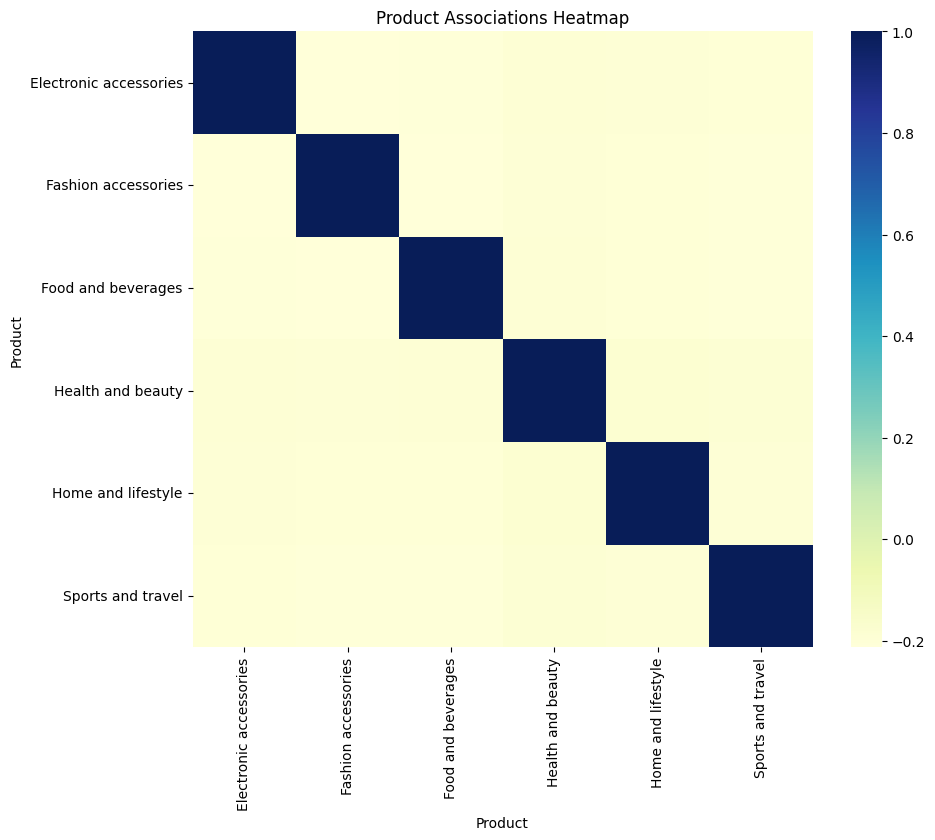

In [2558]:
# Visualize product associations using a heatmap
# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(basket_sets.corr(), cmap="YlGnBu")
plt.title("Product Associations Heatmap")
plt.xlabel("Product")
plt.ylabel("Product")
plt.show()

## Price Elasticity Analysis:
Scatter plot showing the relationship between sales volume and price.

Price elasticity curve to visualize the responsiveness of sales to price changes.

In [2559]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster
Invoice ID,,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0,1
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0,2
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0,2
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0,2
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0,0


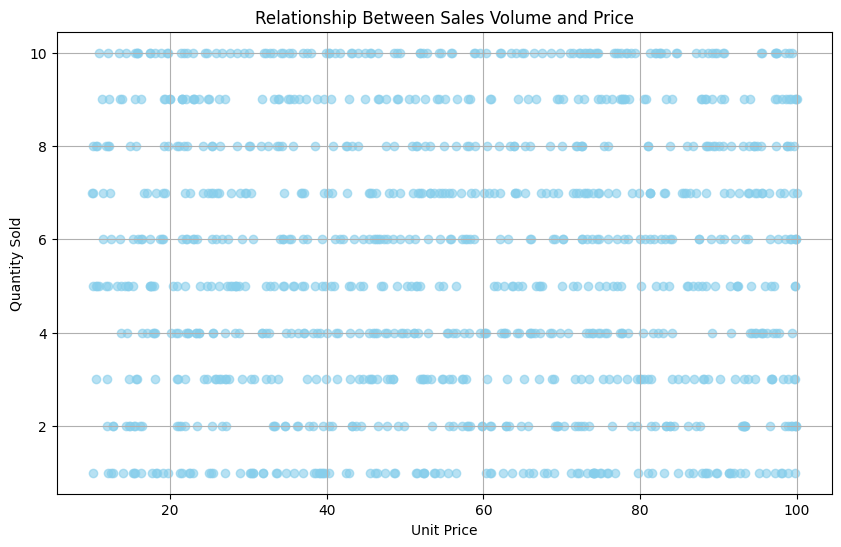

In [2560]:
# Scatter plot for relationship between sales volume and price
plt.figure(figsize=(10, 6))
plt.scatter(df['Unit price'], df['Quantity'], color='skyblue', alpha=0.6)
plt.title('Relationship Between Sales Volume and Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

In [2561]:
# Price elasticity curve
# Calculate total revenue for each sale
df['Total Revenue'] = df['Unit price'] * df['Quantity']
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster,Total Revenue
Invoice ID,,,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0,1,323.20
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0,2,560.34
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0,2,527.90
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0,2,495.63
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0,0,74.22


In [2562]:
# Group data by unit price and calculate total revenue
price_elasticity_data = df.groupby('Unit price')['Total Revenue'].sum().reset_index()
price_elasticity_data

,Unit price,Total Revenue
0,10.08,70.56
1,10.13,70.91
2,10.16,50.80
3,10.17,10.17
4,10.18,81.44
...,...,...
938,99.82,1098.02
939,99.83,598.98
940,99.89,199.78
941,99.92,599.52


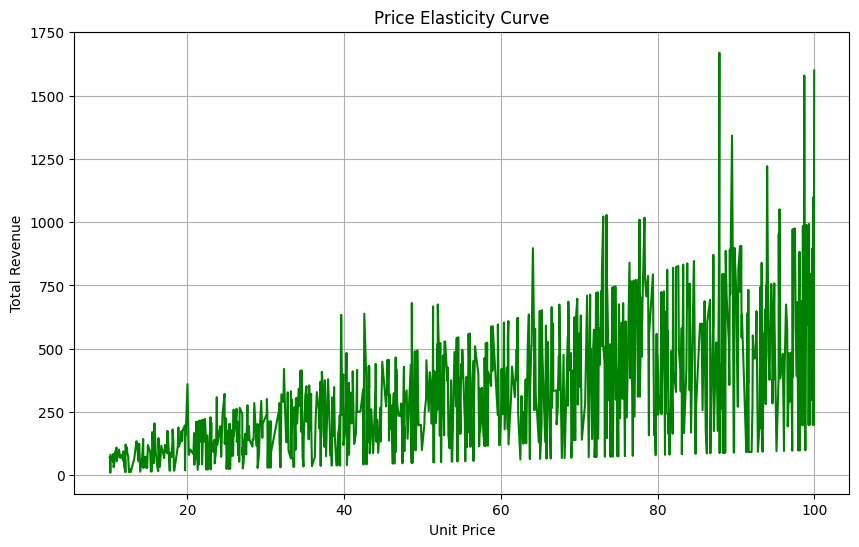

In [2563]:
# Plot price elasticity curve
plt.figure(figsize=(10, 6))
plt.plot(price_elasticity_data['Unit price'], price_elasticity_data['Total Revenue'], color='green')
plt.title('Price Elasticity Curve')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

## Inventory Management:
Inventory turnover ratio analysis over time.

ABC analysis to categorize products based on their importance.

In [2564]:
# Calculate monthly inventory turnover ratio
monthly_inventory_turnover = df.groupby(pd.Grouper(key='Date', freq='M'))[['cogs']].sum() / df.groupby(pd.Grouper(key='Date', freq='M'))[['cogs']].mean()
monthly_inventory_turnover

,cogs
Date,
2019-01-31,352.0
2019-02-28,303.0
2019-03-31,345.0


<Figure size 1000x600 with 0 Axes>

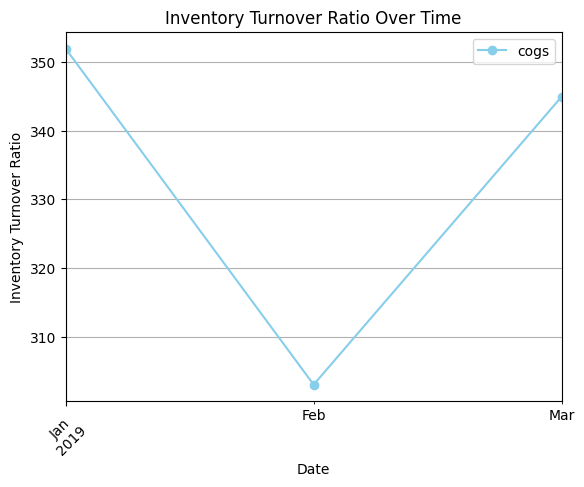

In [2565]:
# Plot inventory turnover ratio over time
plt.figure(figsize=(10, 6))
monthly_inventory_turnover.plot(kind='line', marker='o', color='skyblue')
plt.title('Inventory Turnover Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Turnover Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [2566]:
# Assuming 'Total' column represents sales value for each product
# Calculate cumulative sales for each product
cumulative_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False).cumsum()
cumulative_sales

Product line
Food and beverages         56144.8440
Sports and travel         111267.6705
Electronic accessories    165605.2020
Fashion accessories       219911.0970
Home and lifestyle        273773.0100
Health and beauty         322966.7490
Name: Total, dtype: float64

In [2567]:
# # Create a DataFrame with the cumulative sales data
# cumulative_sales = pd.Series({
#     'Food and beverages': 56144.8440,
#     'Sports and travel': 111267.6705,
#     'Electronic accessories': 165605.2020,
#     'Fashion accessories': 219911.0970,
#     'Home and lifestyle': 273773.0100,
#     'Health and beauty': 322966.7490
# })

In [2568]:
# # Determine categories based on cumulative sales
# total_sales = cumulative_sales.max()
# category_thresholds = [0.25 * total_sales, 0.5 * total_sales, 0.75 * total_sales]  # Define thresholds for categories
# categories = pd.cut(cumulative_sales, bins=[0] + category_thresholds + [total_sales], labels=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])

# print(categories)

In [2569]:
# # Determine categories based on cumulative sales
# total_sales = cumulative_sales.max()

# category_thresholds = [0.7 * total_sales, 0.9 * total_sales]  # Define thresholds for categories
# categories = pd.cut(cumulative_sales, bins=[0] + category_thresholds + [total_sales], labels=['Food and beverages', 'Sports and travel', 'Electronic accessories', 'Fashion accessories', 'Home and lifestyle', 'Health and beauty'])

## Profitability Analysis:
Profit margin analysis by product category or SKU.

Contribution margin analysis to identify products contributing most to profitability.

In [2570]:
# Calculate profit margin for each product category
df['Profit Margin'] = (df['gross income'] / df['Total']) * 100
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster,Total Revenue,Profit Margin
Invoice ID,,,,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0,1,323.20,4.761905
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0,2,560.34,4.761905
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0,2,527.90,4.761905
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0,2,495.63,4.761905
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0,0,74.22,4.761905


In [2571]:
# Group by product category and calculate average profit margin
profit_margin_by_category = df.groupby('Product line')['Profit Margin'].mean().sort_values(ascending=False)
profit_margin_by_category

Product line
Electronic accessories    4.761905
Fashion accessories       4.761905
Food and beverages        4.761905
Health and beauty         4.761905
Home and lifestyle        4.761905
Sports and travel         4.761905
Name: Profit Margin, dtype: float64

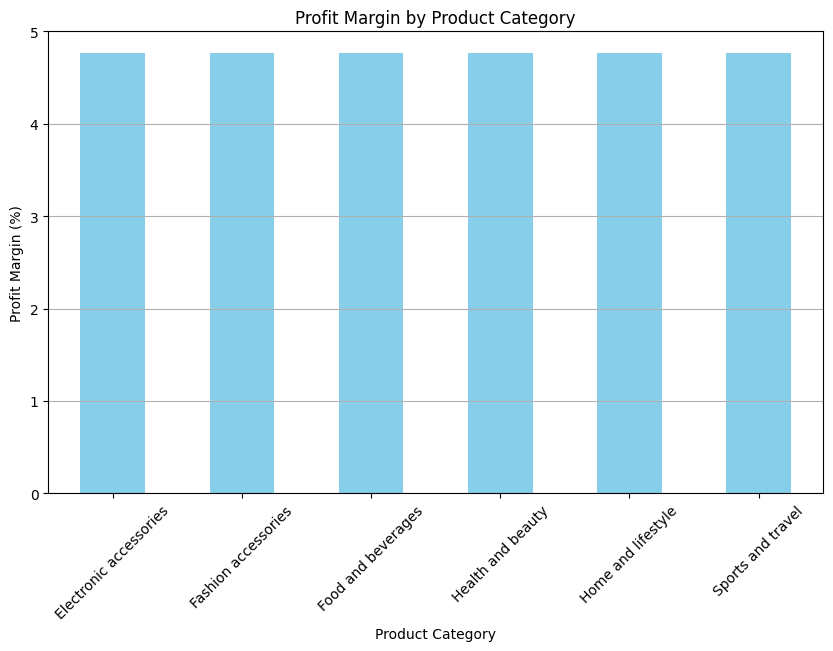

In [2572]:
# Plot profit margin by product category
plt.figure(figsize=(10, 6))
profit_margin_by_category.plot(kind='bar', color='skyblue')
plt.title('Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [2573]:
# Contribution Margin Analysis
# Calculate contribution margin for each product
df['Contribution Margin'] = df['Total'] - df['cogs']
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster,Total Revenue,Profit Margin,Contribution Margin
Invoice ID,,,,,,,,,,,,,,,,,,,,
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0,1,323.20,4.761905,16.1600
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0,2,560.34,4.761905,28.0170
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0,2,527.90,4.761905,26.3950
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0,2,495.63,4.761905,24.7815
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0,0,74.22,4.761905,3.7110


In [2574]:
# Identify top products by contribution margin
top_contributing_products = df.groupby('Product line')['Contribution Margin'].sum().sort_values(ascending=False).head(10)
top_contributing_products

Product line
Food and beverages        2673.5640
Sports and travel         2624.8965
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Home and lifestyle        2564.8530
Health and beauty         2342.5590
Name: Contribution Margin, dtype: float64

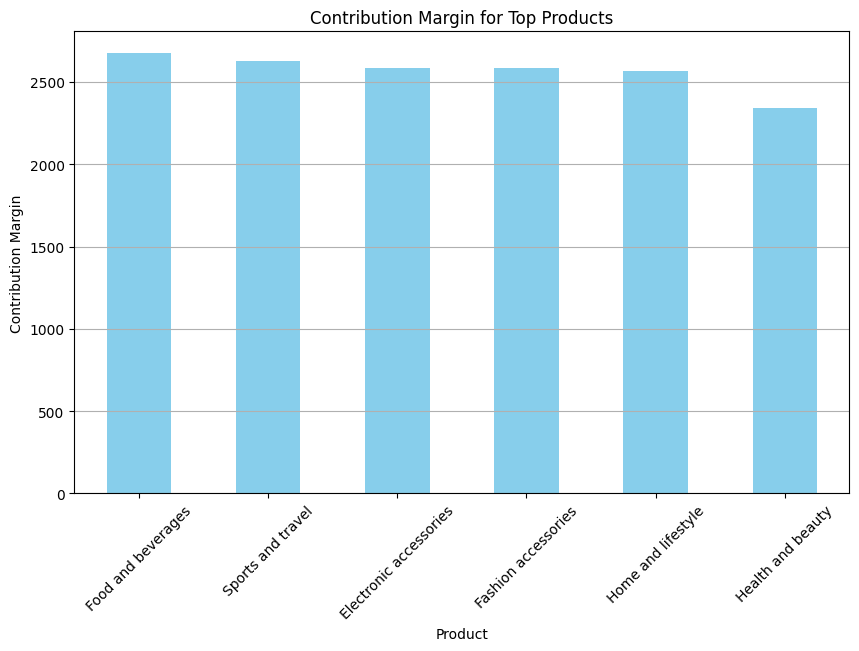

In [2575]:
# Plot contribution margin for top products
plt.figure(figsize=(10, 6))
top_contributing_products.plot(kind='bar', color='skyblue')
plt.title('Contribution Margin for Top Products')
plt.xlabel('Product')
plt.ylabel('Contribution Margin')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Conclusion
In this notebook, we perfomed the exploratory data analysis (EDA) in the supermarket sales data

Along with doing analysis, we also focused on the visualization part, which allows us to understand the data very easily

At last, these Sales Analysis of the Supermarket Data is very helpful to understand the customer behaviour and needs and helpful in taking actions through them